# Where is comet C/2022 E3?

In this notebook we will take a look at the comet C/2022 E3 and create a sky map you can print out. There is no need to take digital devices all the time to get a proper orientation on the night sky. Try it out the *old* style! That what, it'll help you to get a better feeling and understanding on the constellation and will help you navigte the night sky without any help at all (in the long run).

In [1]:
# For today's session we will use a new Astronomy / Space related Python package called skyfield
# The package is listed in the requirements.txt, but you can also install it here in a notebook
# by typing
# >>> !pip install skyfield
import skyfield
import skyfield.api
from skyfield.constants import GM_SUN_Pitjeva_2005_km3_s2 as GM_SUN
from skyfield.data import hipparcos as skyfield_hipparcos
from skyfield.data import mpc as skyfield_mpc
from skyfield.data import stellarium as skyfield_stellarium
from skyfield.projections import build_stereographic_projection as skyfield_build_stereographic_projection

In [2]:
# Standard libraries
import datetime

# Installed libraries
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Skyfield has it's own datetime format. Let's create a list with 11 days that we'll use to compute
# the comet's position
comet_ini_datetime = datetime.datetime(year=2023, month=1, day=29, tzinfo=datetime.timezone.utc)
comet_datetime_list = [comet_ini_datetime + datetime.timedelta(days=k) for k in range(11)]

# Now we need the skyfield timescale to convert it to Ephemeris Time (similar to SPICE)
timescale = skyfield.api.load.timescale()
comet_timesteps = timescale.from_datetimes(comet_datetime_list)

In [4]:
# Additionally, we need the Sun's and Earth's information
generic_spk_kernel = skyfield.api.load_file("../kernels/spk/de432s.bsp")

# Compared to SPICE this is more "human readable"
sun = generic_spk_kernel["sun"]
earth = generic_spk_kernel["earth"]

What do we need to create a sky map showing us the comet?

Well first of all, apparently, the comet data itself. Further, we need time information and data for Earth's positions w.r.t. the Sun (as already done). We also want to plot stars and scale them, depending on their brightness (like in Stellarium) and further, we'd like to add some constellation lines between the stars as an additional "guide for the eye". Let's go:

In [5]:
# Comet data from MPC
with skyfield.api.load.open(skyfield_mpc.COMET_URL) as _obj:
    comets_df = skyfield_mpc.load_comets_dataframe(_obj)
    
# Stars from the Hipparcos catalogue
with skyfield.api.load.open(skyfield_hipparcos.URL) as _obj:
    stars_df = skyfield_hipparcos.load_dataframe(_obj)
    
# Now the constellation lines
# Note: Currently (29th Jan. 2023), the Stellarium related functions in skyfield cannot handle
# somehow the current Stellarium data. I created an extraction and stored it in this repository to
# load
with open("constellations.txt") as _obj:
    constellations_list = skyfield.data.stellarium.parse_constellations(_obj)

In [6]:
# How does the comet dataframe look like?
comets_df

,perihelion_year,perihelion_month,perihelion_day,perihelion_distance_au,eccentricity,argument_of_perihelion_degrees,longitude_of_ascending_node_degrees,inclination_degrees,magnitude_g,magnitude_k,designation,reference
0,1997,3,29.5680,0.889869,0.994969,130.4085,282.5592,89.3710,-2.0,4.0,C/1995 O1 (Hale-Bopp),MPEC 2022-S20
1,2026,6,14.6778,2.586992,0.314605,333.4126,40.0085,2.6010,11.5,4.0,P/1996 R2 (Lagerkvist),NK 1615
2,2027,9,6.3478,3.423928,0.243302,244.6472,159.0374,5.0265,13.0,2.0,P/1998 VS24 (LINEAR),MPC 75703
3,2025,10,29.8110,1.122017,0.672539,231.3114,137.8646,7.5650,20.0,2.0,P/1999 RO28 (LONEOS),NK 731
4,2025,12,22.9522,3.299370,0.210487,161.6711,285.2965,5.0299,13.5,2.0,P/1999 XN120 (Catalina),MPC 75704
...,...,...,...,...,...,...,...,...,...,...,...,...
972,2027,1,17.4145,5.497689,0.310421,21.0978,124.8564,10.5518,6.5,4.0,450P/LONEOS,MPEC 2022-TA6
973,2022,11,27.5343,2.798526,0.558466,186.6968,300.9123,26.4827,13.5,4.0,451P/Christensen,MPEC 2023-BF4
974,2023,4,25.7053,4.178158,0.427177,37.0552,123.7001,6.4226,9.0,4.0,452P/Sheppard-Jewitt,MPEC 2023-BF4
975,2017,9,9.4886,0.255240,1.199252,241.6845,24.5997,122.6778,23.0,2.0,1I/`Oumuamua,MPC107687


In [7]:
# How does the stars dataframe look like?
stars_df

,magnitude,ra_degrees,dec_degrees,parallax_mas,ra_mas_per_year,dec_mas_per_year,ra_hours,epoch_year
hip,,,,,,,,
1,9.10,0.000912,1.089013,3.54,-5.20,-1.88,0.000061,1991.25
2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,0.000253,1991.25
3,6.61,0.005008,38.859286,2.81,5.24,-2.91,0.000334,1991.25
4,8.06,0.008382,-51.893546,7.75,62.85,0.16,0.000559,1991.25
5,8.55,0.009965,-40.591224,2.87,2.53,9.07,0.000664,1991.25
...,...,...,...,...,...,...,...,...
118318,6.99,359.963744,11.673709,1.92,-2.16,2.09,23.997583,1991.25
118319,8.23,359.973913,-22.428180,10.63,148.74,27.53,23.998261,1991.25
118320,7.59,359.976057,5.956638,5.00,20.92,-35.26,23.998404,1991.25


In [8]:
# ... and the constellation list:
print(constellations_list[0])

('And', [(7607, 4436), (4436, 2912), (2912, 677), (677, 3092), (3092, 5447), (5447, 9640), (4436, 5447), (3693, 3092), (3092, 2912), (2912, 1473), (1473, 1366), (1366, 1686), (1686, 1473)])


In [9]:
# Extract the comet C/2022 E3
comet_row = comets_df.loc[comets_df["designation"].str.contains("C/2022 E3")].squeeze()

# Similar like SPICE: we need to set the orbit w.r.t. a center object. Here: the Sun
comet = sun + skyfield.data.mpc.comet_orbit(comet_row, timescale, GM_SUN)

In [10]:
# Now we parse the constellation information
edges = [edge for name, edges in constellations_list for edge in edges]
edges_star1 = [star1 for star1, star2 in edges]
edges_star2 = [star2 for star1, star2 in edges]

In [11]:
# Now we extract the stars' position as seen from Earth for a particular time and compute their
# positions w.r.t. a set projection
star_positions = earth.at(comet_timesteps[5]).observe(skyfield.api.Star.from_dataframe(stars_df))

# In between we can set a center for our projection. Here: the middle of our comet time list
center = earth.at(comet_timesteps[5]).observe(comet)
projection = skyfield_build_stereographic_projection(center)

stars_df['x'], stars_df['y'] = projection(star_positions)

# Do the same thing with the comet!
comet_x, comet_y = projection(earth.at(comet_timesteps).observe(comet))

# Creating the Sky Map
Now we create the sky map. Note: We use a dark-mode style with a red-color for the stars. The reason is that we want to create maps that can be used outside in night. The eye adapts to the darkness, but takes around 15 - 30 min to adapt perfectly. Bright light "resets" the adaption; however, red light has little impact. Thus, we create a rather dark sky map with little to no reflective properties.

In [12]:
# Now set the field of view in degrees and the limiting magnitude
FOV_deg = 90.0
lim_mag = 6

# Apply the limiting magnitude
stars_df.loc[:, "visible"] = stars_df["magnitude"].apply(lambda x: 1 if x<=lim_mag else 0)
stars_df.loc[:, "plot_size"] = stars_df["magnitude"].apply(lambda x: (1.0 + lim_mag - x)**2.0)

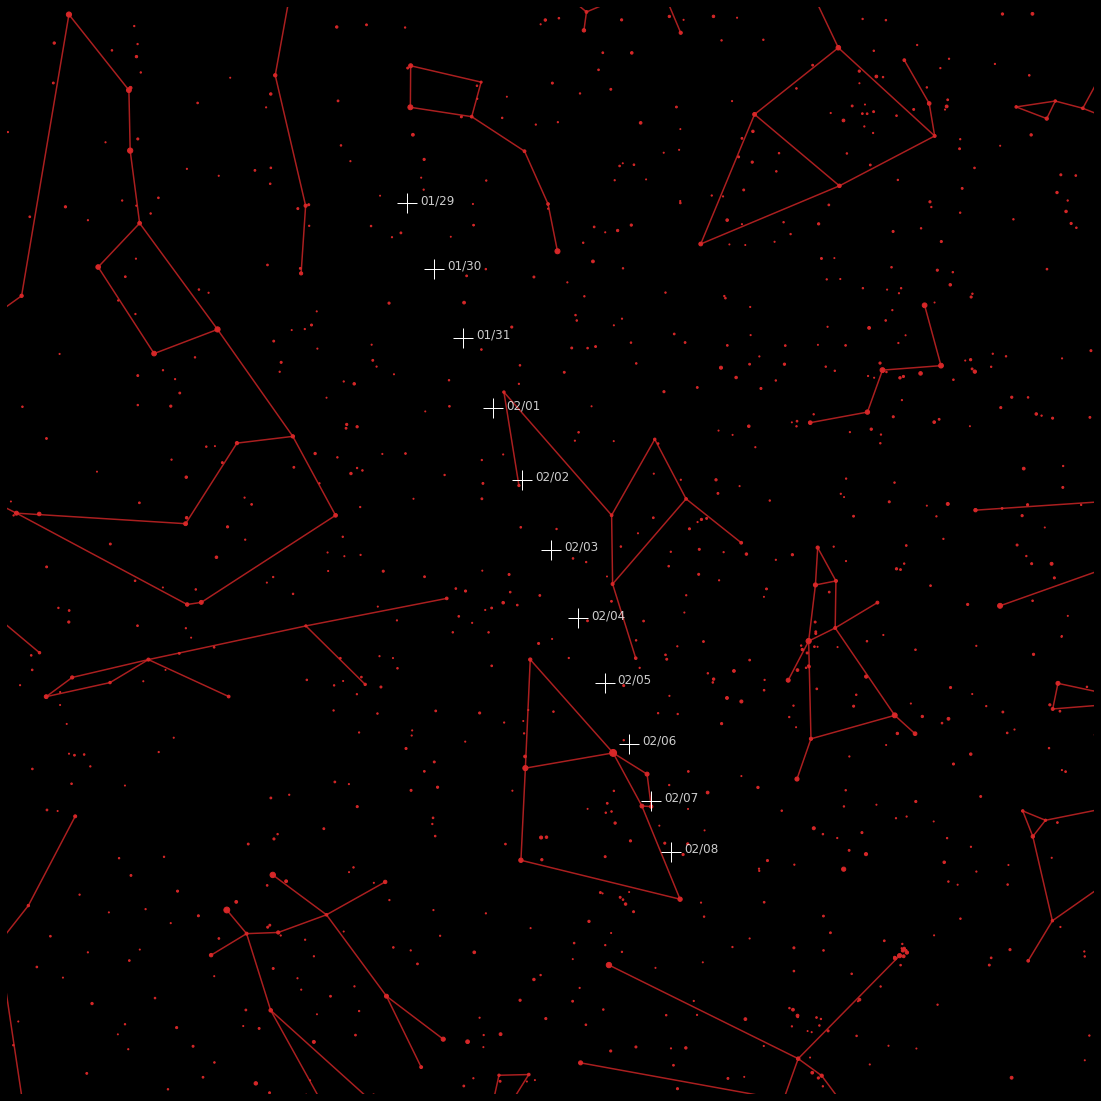

In [13]:
# Time to build the figure!
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=[20, 20])

# Add the stars
ax.scatter(stars_df.loc[stars_df["visible"]==1]["x"],
           stars_df.loc[stars_df["visible"]==1]["y"],
           s=stars_df.loc[stars_df["visible"]==1]["plot_size"],
           color="tab:red")

# Add the constellations
xy1 = stars_df[["x", "y"]].loc[edges_star1].values
xy2 = stars_df[["x", "y"]].loc[edges_star2].values
lines_xy = np.rollaxis(np.array([xy1, xy2]), 1)
ax.add_collection(matplotlib.collections.LineCollection(lines_xy, colors="tab:red", alpha=.8))

# Add the comet
ax.plot(comet_x,
        comet_y,
        marker='+',
        markersize=20,
        lw=0,
        c="white")

# Set the dates
for _x, _y, _date in zip(comet_x, comet_y, comet_timesteps.utc_strftime('%m/%d')):
    comet_date_text = ax.text(_x + 0.01,
                              _y - 0.00,
                              _date,
                              color="white",
                              fontsize=12)
    comet_date_text.set_alpha(0.8)

# More parameters
angle = np.pi - FOV_deg / 360.0 * np.pi
limit = np.sin(angle) / (1.0 - np.cos(angle))
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_aspect(1.0)

# Remove Frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)